# **Load and Preprocessing data**

In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [120]:
df=pd.read_csv("heart.csv")

In [121]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [123]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [124]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [125]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [126]:
def count_value_allcol(data) :
  print(data['FastingBS'].value_counts())
  print(data['HeartDisease'].value_counts())
  for col in data.columns:
    if data[col].dtype=='object':
        print(col)
        print(data[col].unique())
        print(data[col].value_counts())

In [127]:
count_value_allcol(df)

0    704
1    214
Name: FastingBS, dtype: int64
1    508
0    410
Name: HeartDisease, dtype: int64
Sex
['M' 'F']
M    725
F    193
Name: Sex, dtype: int64
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG
['Normal' 'ST' 'LVH']
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ExerciseAngina
['N' 'Y']
N    547
Y    371
Name: ExerciseAngina, dtype: int64
ST_Slope
['Up' 'Flat' 'Down']
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [128]:
for col in df.columns:
  if df[col].dtype=='int64':
    print(col)
    print(df[col].unique())
    print(str(df[col].min())+" "+ "Number Value of min in column" +" "+ col)
    print(str(df[col].max())+" "+ "Number Value of max in column" +" "+ col)

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
28 Number Value of min in column Age
77 Number Value of max in column Age
RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
0 Number Value of min in column RestingBP
200 Number Value of max in column RestingBP
Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 2

In [129]:
def anlay_colu(df):
  """
  the number of value in Age is: M-725 ,  F-193
  the number of value in ChestPainType is: ASY-496  , NAP-203  , ATA-173  , TA-46
  the number of value in ExerciseAngina is: N-547 , Y-371
  the number of value in RestingECG is: Normal-552 , LVH-188 , ST-178
  the number of value in FastingBS is: 0-704 , 1-214
  the number of value in ST_Slope is: Flat-460 , Up-395 , Down-63
  the number of value in HeartDisease is: 1-508 , 0-410 """
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='NAP') & (df['HeartDisease']==1)])) + " " + "The number of people who have NAP and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ATA') & (df['HeartDisease']==1)])) + " " + "The number of people who have ATA and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='TA') & (df['HeartDisease']==1)])) + " " + "The number of people who have TA and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal  and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH  and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST  and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['ExerciseAngina']=='N') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal , N and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['ExerciseAngina']=='Y') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal , Y and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['ExerciseAngina']=='N') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH , N and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['ExerciseAngina']=='Y') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH , Y and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='N') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , N and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal , Y , Flat and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Up') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal , Y , Up and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Down') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal , Y , Down and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH , Y , Flat and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Up') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH , Y , Up and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Down') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH , Y , Down and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Up') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Up and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Down') & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Down and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==1) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal , Y , Flat , 1 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='Normal') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==0) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , Normal , Y , Flat , 0 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==1) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH , Y , Flat , 1 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='LVH') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==0) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , LVH , Y , Flat , 0 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==1) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 1 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==0) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 0 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==1) & (df['Sex']=='M') & (df['Age']>50) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 1 , sex:M ,Age>50 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==0) & (df['Sex']=='M') & (df['Age']>50) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 0 , sex:M ,Age>50 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==1) & (df['Sex']=='F') & (df['Age']>50) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 1 , sex:F ,Age>50 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==0) & (df['Sex']=='F') & (df['Age']>50) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 0 , sex:F ,Age>50 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==1) & (df['Sex']=='M') & (df['Age']<50) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 1 , sex:M ,Age<50 and have heart disease " )
  print(str(len(df.loc[(df['ChestPainType']=='ASY') & (df['RestingECG']=='ST') & (df['ExerciseAngina']=='Y') & (df['ST_Slope']=='Flat') & (df['FastingBS']==0) & (df['Sex']=='M') & (df['Age']<50) & (df['HeartDisease']==1)])) + " " + "The number of people who have ASY , ST , Y , Flat , 0 , sex:M ,Age<50 and have heart disease " )

In [130]:
anlay_colu(df)

392 The number of people who have ASY and have heart disease 
72 The number of people who have NAP and have heart disease 
24 The number of people who have ATA and have heart disease 
20 The number of people who have TA and have heart disease 
224 The number of people who have ASY , Normal  and have heart disease 
81 The number of people who have ASY , LVH  and have heart disease 
87 The number of people who have ASY , ST  and have heart disease 
76 The number of people who have ASY , Normal , N and have heart disease 
148 The number of people who have ASY , Normal , Y and have heart disease 
27 The number of people who have ASY , LVH , N and have heart disease 
54 The number of people who have ASY , LVH , Y and have heart disease 
21 The number of people who have ASY , ST , N and have heart disease 
66 The number of people who have ASY , ST , Y and have heart disease 
118 The number of people who have ASY , Normal , Y , Flat and have heart disease 
13 The number of people who have ASY

In [131]:
df_bk=df.copy()

In [132]:
df_bk.rename(columns={'HeartDisease':'HeartFailure'},inplace=True)
df_bk.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [133]:
Colaration=df_bk.corr()
Colaration

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartFailure
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartFailure,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


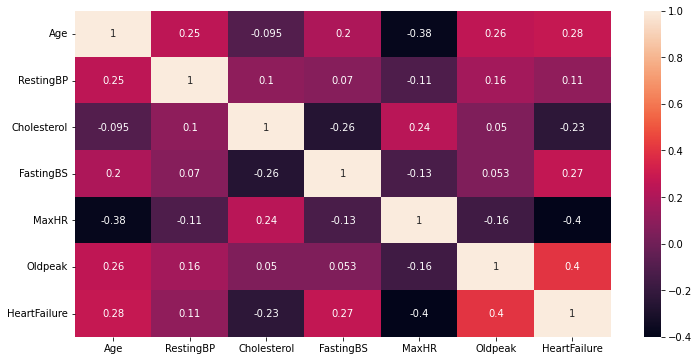

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(Colaration,annot=True)

# **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



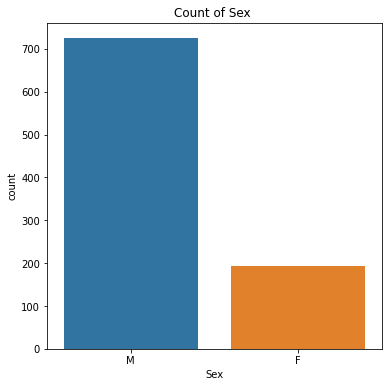

In [135]:
plt.figure(figsize=(6,6))
sns.countplot(df_bk['Sex'])
plt.title('Count of Sex ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



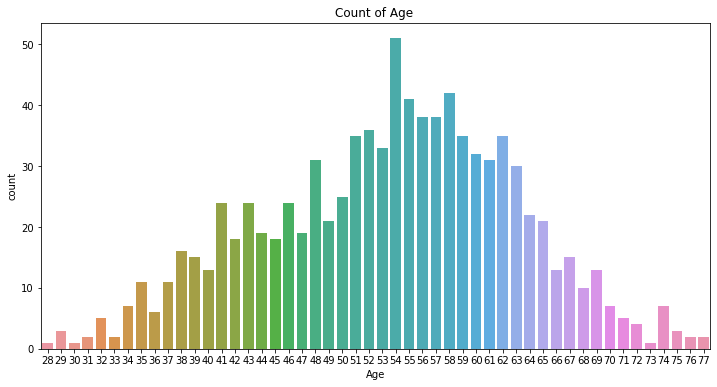

In [136]:
plt.figure(figsize=(12,6))
sns.countplot(df_bk['Age'])
plt.title('Count of Age ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



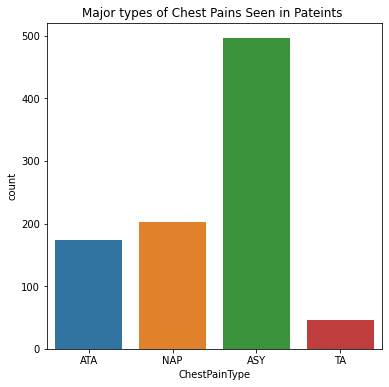

In [137]:
plt.figure(figsize=(6,6))
sns.countplot(df_bk['ChestPainType'])
plt.title('Major types of Chest Pains Seen in Pateints ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



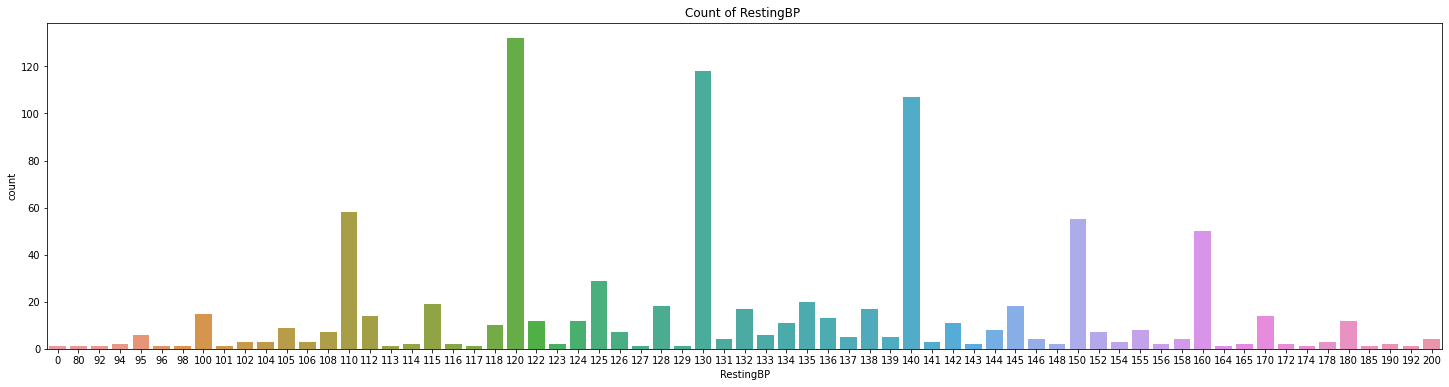

In [138]:
plt.figure(figsize=(25,6))
sns.countplot(df_bk['RestingBP'])
plt.title('Count of RestingBP ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



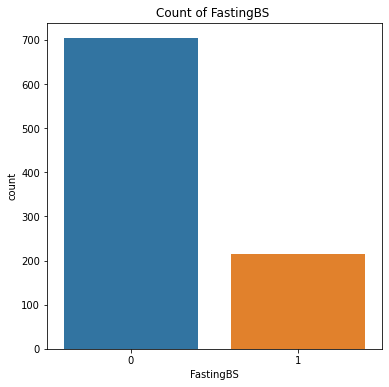

In [139]:
plt.figure(figsize=(6,6))
sns.countplot(df_bk['FastingBS'])
plt.title('Count of FastingBS ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



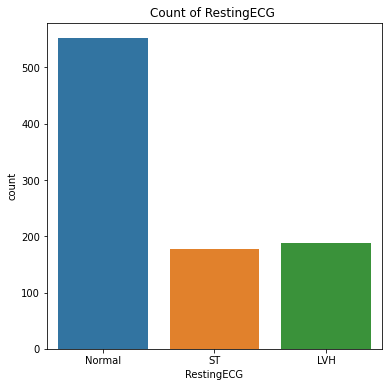

In [140]:
plt.figure(figsize=(6,6))
sns.countplot(df_bk['RestingECG'])
plt.title('Count of RestingECG ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



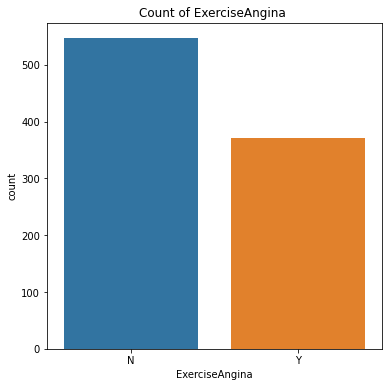

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(df_bk['ExerciseAngina'])
plt.title('Count of ExerciseAngina ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



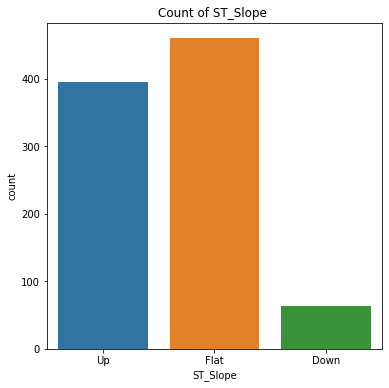

In [142]:
plt.figure(figsize=(6,6))
sns.countplot(df_bk['ST_Slope'])
plt.title('Count of ST_Slope ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



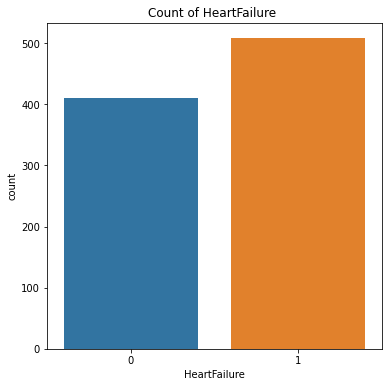

In [143]:
plt.figure(figsize=(6,6))
sns.countplot(df_bk['HeartFailure'])
plt.title('Count of HeartFailure ')
plt.show()

In [144]:
px.pie(df_bk,values='HeartFailure',names='Sex',color='Sex',color_discrete_map={'F':'red','M':'blue'},template='plotly_dark',title='Gender differences in HeartFailure')

In [145]:
px.pie(df_bk,values='HeartFailure',names='ST_Slope',color='ST_Slope',color_discrete_map={'Flat':'red','Up':'blue','Down':'yellow'},template='plotly_dark',title='Gender differences in HeartFailure')

In [146]:
px.pie(df,values='HeartDisease',names='ChestPainType',color='ChestPainType',color_discrete_map={'ASY':'red','NAP':'blue','ATA':'yellow','TA':'green'},template='plotly_dark',title='Gender differences in HeartFailure')

In [147]:
px.pie(df_bk,values='HeartFailure',names='FastingBS',color='FastingBS',color_discrete_map={'1':'red','0':'blue'},template='plotly_dark',title='Gender differences in HeartFailure')

In [148]:
px.scatter(df_bk,x='Age',y='RestingBP',color='Sex',size='RestingBP',labels={'RestingBP':'BloodPressure'},template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.RdBu,title='Age Vs BloodPressure')

In [149]:
px.scatter(df_bk,x='Age',y='MaxHR',color='Sex',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate','Sex':'sex'},template='plotly_dark',opacity=0.8,color_discrete_map={'F':'orange','M':'red'},title='Age Vs HeartRate')

In [150]:
px.scatter(df_bk,x='RestingBP',y='MaxHR',color='Sex',size='MaxHR',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='BloodPressure Vs HeartRate')

In [151]:
px.scatter(df_bk,x='Oldpeak',y='Age',color='HeartFailure',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='plotly_dark',opacity=0.8,color_discrete_sequence=px.colors.sequential.RdBu,title='Oldpeak VS HeartFailure')

In [152]:
px.violin(df_bk,x='ChestPainType',y='MaxHR',color='ChestPainType',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='ChestPainType Vs HeartRate')

In [153]:
px.scatter(df_bk,x='Age',y='MaxHR',color='ChestPainType',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.Plasma,title='ChestPainType Vs HeartRate')

In [154]:
px.violin(df_bk,x='RestingECG',y='MaxHR',color='HeartFailure',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='RestingECG Vs HeartRate')

In [155]:
px.scatter(df_bk,x='Age',y='MaxHR',color='RestingECG',size='MaxHR',labels={'Age':'age','MaxHR':'HeartRate'},template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.RdBu,title='RestingECG Vs HeartRate')

In [156]:
px.violin(df_bk,x='ST_Slope',y='MaxHR',color='ST_Slope',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='ST_Slope Vs HeartRate')

In [157]:
px.scatter(df_bk,x='RestingBP',y='MaxHR',color='ST_Slope',size='MaxHR',template='plotly_dark',labels={'RestingBP':'BloodPressure','MaxHR':'HeartRate'},opacity=0.9,color_discrete_sequence=px.colors.sequential.RdBu,title='ST_Slope Vs HeartRate')

In [158]:
px.violin(df_bk,x='HeartFailure',y='MaxHR',color='HeartFailure',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='HeartFailure Vs HeartRate')

# **Some Of Reports** 

In [159]:
pip install bloxs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
from bloxs import B
B(508, "People with Heart Disease!")

In [161]:
B([
    B(458, "People with Sex=M and Heart Disease"),
    B("75%", "People with Flat and Heart Disease", progress=75),
    B("15.4%", "People with up and Heart Disease", progress=15.4),
    B("9.69%", "People with Down and Heart Disease", progress=15.4),
    B("90.2%", "People with sex =M and Heart Disease", progress=90.2),
    B("9.84%", "People with sex =F and Heart Disease", progress=9.84),
])

# **Preparing Data To Model** 

In [162]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_bk.columns:
    if df_bk[col].dtype=='object':
        df_bk[col]=le.fit_transform(df[col]) 

In [163]:
df_bk.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [164]:
#Preparing Data
x=df_bk.drop('HeartFailure',axis=1)
y=df_bk['HeartFailure']

# **Heart Failure Prediction**


In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((642, 11), (276, 11), (642,), (276,))

In [166]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [167]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}

In [168]:
result=pd.DataFrame(a)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[136  28]
 [ 11 101]]
Outcome values : 
 136 28 11 101
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.83      0.87       164
           0       0.78      0.90      0.84       112

    accuracy                           0.86       276
   macro avg       0.85      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276

Accuracy : 85.9 %
Precision : 92.5 %
Recall : 82.9 %
F1 Score : 0.875
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 86.5 %
MCC : MCC
roc_auc_score: 0.866


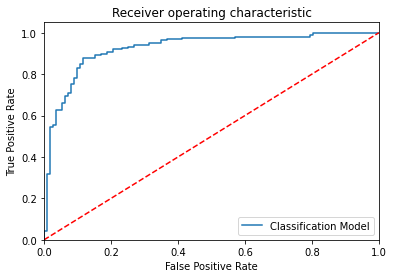

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[113  51]
 [ 31  81]]
Outcome values : 
 113 51 31 81
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.69      0.73       164
           0       0.61      0.72      0.66       112

    accuracy                           0.70       276
   macro avg       0.70      0.71      0.70       276
weighted avg       0.72      0.70      0.71       276

Accuracy : 70.3 %
Precision : 78.5 %
Recall : 68.9 %
F1 Score : 0.734
Specificity or True Negative Rate : 72.3 %
Balanced Accuracy : 70.6 %
MCC : MCC
roc_auc_score: 0.706


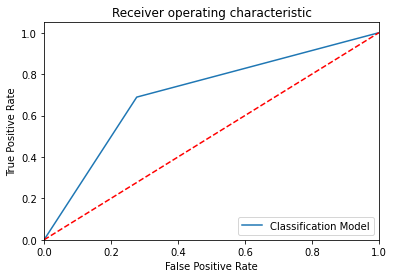

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[146  18]
 [ 16  96]]
Outcome values : 
 146 18 16 96
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.89      0.90       164
           0       0.84      0.86      0.85       112

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276

Accuracy : 87.7 %
Precision : 90.1 %
Recall : 89.0 %
F1 Score : 0.896
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 87.4 %
MCC : MCC
roc_auc_score: 0.874


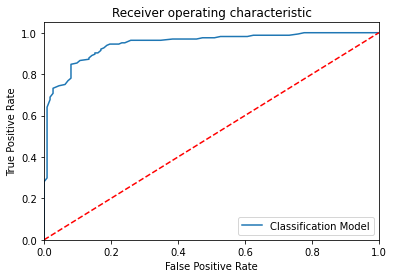

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[146  18]
 [ 12 100]]
Outcome values : 
 146 18 12 100
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.89      0.91       164
           0       0.85      0.89      0.87       112

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

Accuracy : 89.1 %
Precision : 92.4 %
Recall : 89.0 %
F1 Score : 0.907
Specificity or True Negative Rate : 89.3 %
Balanced Accuracy : 89.2 %
MCC : MCC
roc_auc_score: 0.892


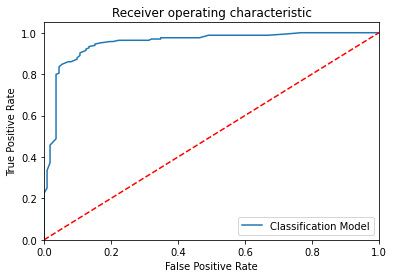

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[137  27]
 [ 13  99]]
Outcome values : 
 137 27 13 99
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.84      0.87       164
           0       0.79      0.88      0.83       112

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276

Accuracy : 85.5 %
Precision : 91.3 %
Recall : 83.5 %
F1 Score : 0.873
Specificity or True Negative Rate : 88.4 %
Balanced Accuracy : 85.9 %
MCC : MCC
roc_auc_score: 0.86


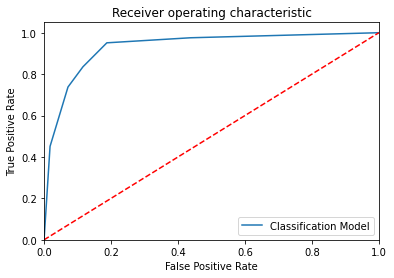

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[148  16]
 [ 15  97]]
Outcome values : 
 148 16 15 97
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.90      0.91       164
           0       0.86      0.87      0.86       112

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276

Accuracy : 88.8 %
Precision : 90.8 %
Recall : 90.2 %
F1 Score : 0.905
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 88.4 %
MCC : MCC
roc_auc_score: 0.884


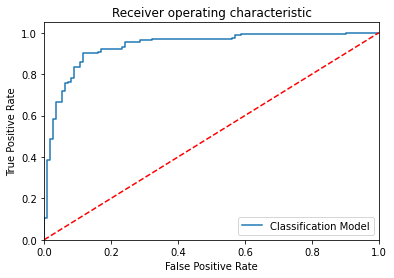

-----------------------------------------------------------------------------------------------------


In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values
    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    """Compute the Matthews correlation coefficient (MCC).
T      he Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass 
       classifications.It takes into account true and false positives and negatives and is generally regarded 
       as a balanced measure which can be used even if the classes are of very different sizes. 
       The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction
      , 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.""" 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

In [170]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),136.0,28.0,11.0,101.0,0.859,0.925,0.829,0.875,0.902,0.719,0.865527,0.865
1,DecisionTreeClassifier(),113.0,51.0,31.0,81.0,0.703,0.785,0.689,0.734,0.723,0.405,0.706119,0.706
2,"(DecisionTreeClassifier(max_features='auto', r...",146.0,18.0,16.0,96.0,0.877,0.901,0.890,0.896,0.857,0.745,0.873693,0.874
3,"(ExtraTreeClassifier(random_state=1332762545),...",146.0,18.0,12.0,100.0,0.891,0.924,0.890,0.907,0.893,0.777,0.891551,0.892
4,KNeighborsClassifier(),137.0,27.0,13.0,99.0,0.855,0.913,0.835,0.873,0.884,0.709,0.859647,0.859
5,SVC(probability=True),148.0,16.0,15.0,97.0,0.888,0.908,0.902,0.905,0.866,0.767,0.884255,0.884


In [171]:
top3=result.sort_values(by=['F1 Score','Accuracy','True Positive','True Negative'],ascending=False).reset_index(drop=True).head()
top3

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(ExtraTreeClassifier(random_state=1332762545),...",146.0,18.0,12.0,100.0,0.891,0.924,0.890,0.907,0.893,0.777,0.891551,0.892
1,SVC(probability=True),148.0,16.0,15.0,97.0,0.888,0.908,0.902,0.905,0.866,0.767,0.884255,0.884
2,"(DecisionTreeClassifier(max_features='auto', r...",146.0,18.0,16.0,96.0,0.877,0.901,0.890,0.896,0.857,0.745,0.873693,0.874
3,LogisticRegression(),136.0,28.0,11.0,101.0,0.859,0.925,0.829,0.875,0.902,0.719,0.865527,0.865
4,KNeighborsClassifier(),137.0,27.0,13.0,99.0,0.855,0.913,0.835,0.873,0.884,0.709,0.859647,0.859


### **Extra Tree model performs best for this data with an Accuracy of 89%**

In [175]:
from sklearn.ensemble import ExtraTreesClassifier
ModelET = ExtraTreesClassifier()
ModelET.fit(x_train, y_train)
y_pred = models.predict(x_test)

In [176]:
out={'HeartFailure_Actual':y_test,'HeartFailure_Pred':y_pred}
out=pd.DataFrame(out)

In [177]:
df_bk=df_bk.merge(out,left_index=True,right_index=True)
df_bk.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure,HeartFailure_Actual_x,HeartFailure_Pred_x,HeartFailure_Actual_y,HeartFailure_Pred_y
716,67,1,0,120,237,0,1,71,0,1.0,1,1,1,1,1,1
78,52,1,1,140,100,0,1,138,1,0.0,2,0,0,1,0,1
227,38,1,0,92,117,0,1,134,1,2.5,1,1,1,1,1,1
63,46,1,0,120,277,0,1,125,1,1.0,1,1,1,1,1,1
82,63,1,0,150,223,0,1,115,0,0.0,1,1,1,1,1,1
70,57,1,1,140,265,0,2,145,1,1.0,1,1,1,1,1,1
650,48,1,0,130,256,1,0,150,1,0.0,2,1,1,1,1,1
533,63,1,0,110,252,0,2,140,1,2.0,1,1,1,1,1,1
548,66,1,0,112,261,0,1,140,0,1.5,2,1,1,0,1,0
718,57,1,0,165,289,1,0,124,0,1.0,1,1,1,1,1,1
